In [53]:
"""

Data Science Project: Heart Disease Prediction

"""



import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

from umap import UMAP

from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

from keras.utils import to_categorical
from keras import optimizers, regularizers
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input

In [91]:
# Load the dataset
df_s = pd.read_csv('data/switzerland_76_header.csv', sep=',')
df_c = pd.read_csv('data/cleveland_76_header.csv', sep=',')
df_h = pd.read_csv('data/hungarian_76_header.csv', sep=',')
df_v = pd.read_csv('data/long-beach-va_76_header.csv', sep=',')

# powershell: Import-Csv .\cleveland_76_header.csv |Out-GridView



In [120]:
# filter the datasets

# helper functions
def is_unique(col):
    a = col.to_numpy()
    return (a[0] == a).all()
# call: is_unique(df['smoke'])

def unique_cols(df):
    a = df.to_numpy() 
    return (a[0] == a).all(0)
# call: unique_cols(df)


def filter_cols(df):
    # print column names and indices
    counter = 0
    for index, col in enumerate(df.columns):
        # print(index, col) # prints all column names + indices
        if not unique_cols(df[col]):
            #print(index, col) # prints all non-empty colums and index
            counter+= 1
        else : 
            del df[col]
    #print("we have " + str(counter) + " different columns")


filter_cols(df_c)
filter_cols(df_s)
filter_cols(df_h)
filter_cols(df_v)




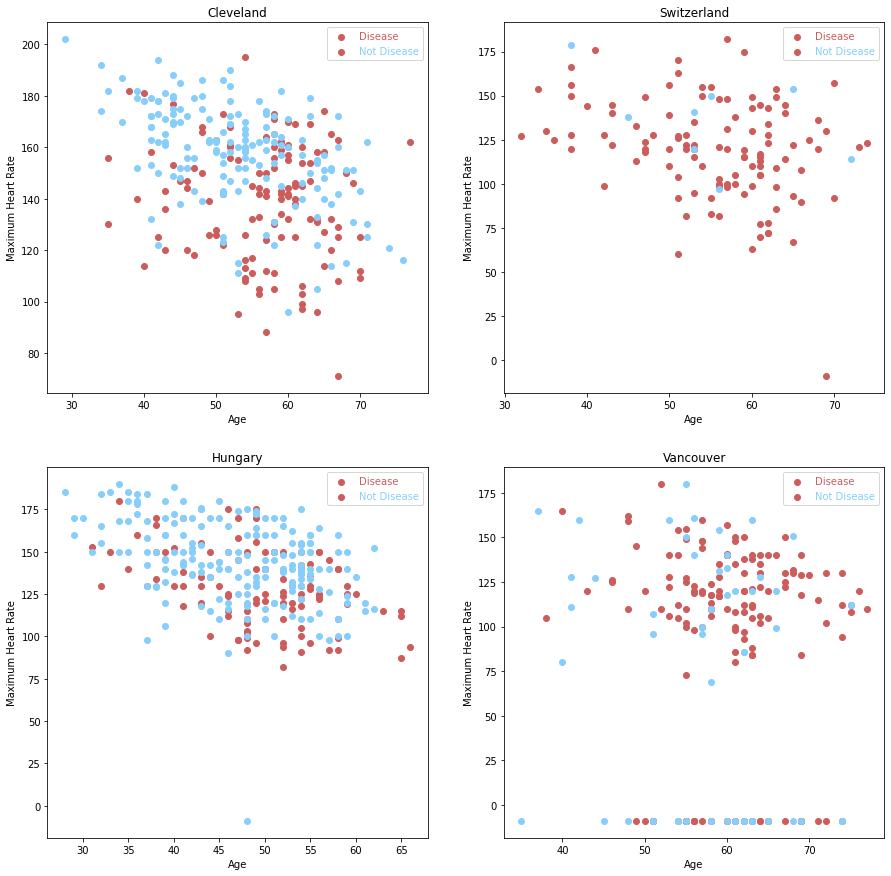

In [119]:
# Vizualize the dataset

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2,figsize=(15,15))

axis[0,0].scatter(x=df_c.age[df_c.num==1], y=df_c.thalach[(df_c.num==1)], c="indianred")
axis[0,0].scatter(x=df_c.age[df_c.num==2], y=df_c.thalach[(df_c.num==2)], c="indianred")
axis[0,0].scatter(x=df_c.age[df_c.num==3], y=df_c.thalach[(df_c.num==3)], c="indianred")
axis[0,0].scatter(x=df_c.age[df_c.num==4], y=df_c.thalach[(df_c.num==4)], c="indianred")
axis[0,0].scatter(x=df_c.age[df_c.num==0], y=df_c.thalach[(df_c.num==0)], c="lightskyblue")
axis[0,0].set_title('Cleveland')
axis[0,0].legend(["Disease", "Not Disease"], labelcolor = ["indianred", "lightskyblue"])
axis[0,0].set_xlabel("Age")
axis[0,0].set_ylabel("Maximum Heart Rate")

axis[0,1].scatter(x=df_s.age[df_s.num==1], y=df_s.thalach[(df_s.num==1)], c="indianred")
axis[0,1].scatter(x=df_s.age[df_s.num==2], y=df_s.thalach[(df_s.num==2)], c="indianred")
axis[0,1].scatter(x=df_s.age[df_s.num==3], y=df_s.thalach[(df_s.num==3)], c="indianred")
axis[0,1].scatter(x=df_s.age[df_s.num==4], y=df_s.thalach[(df_s.num==4)], c="indianred")
axis[0,1].scatter(x=df_s.age[df_s.num==0], y=df_s.thalach[(df_s.num==0)], c="lightskyblue")
axis[0,1].set_title('Switzerland')
axis[0,1].legend(["Disease", "Not Disease"], labelcolor = ["indianred", "lightskyblue"])
axis[0,1].set_xlabel("Age")
axis[0,1].set_ylabel("Maximum Heart Rate")

axis[1,0].scatter(x=df_h.age[df_h.num==1], y=df_h.thalach[(df_h.num==1)], c="indianred")
axis[1,0].scatter(x=df_h.age[df_h.num==2], y=df_h.thalach[(df_h.num==2)], c="indianred")
axis[1,0].scatter(x=df_h.age[df_h.num==3], y=df_h.thalach[(df_h.num==3)], c="indianred")
axis[1,0].scatter(x=df_h.age[df_h.num==4], y=df_h.thalach[(df_h.num==4)], c="indianred")
axis[1,0].scatter(x=df_h.age[df_h.num==0], y=df_h.thalach[(df_h.num==0)], c="lightskyblue")
axis[1,0].set_title('Hungary')
axis[1,0].legend(["Disease", "Not Disease"], labelcolor = ["indianred", "lightskyblue"])
axis[1,0].set_xlabel("Age")
axis[1,0].set_ylabel("Maximum Heart Rate")

axis[1,1].scatter(x=df_v.age[df_v.num==1], y=df_v.thalach[(df_v.num==1)], c="indianred")
axis[1,1].scatter(x=df_v.age[df_v.num==2], y=df_v.thalach[(df_v.num==2)], c="indianred")
axis[1,1].scatter(x=df_v.age[df_v.num==3], y=df_v.thalach[(df_v.num==3)], c="indianred")
axis[1,1].scatter(x=df_v.age[df_v.num==4], y=df_v.thalach[(df_v.num==4)], c="indianred")
axis[1,1].scatter(x=df_v.age[df_v.num==0], y=df_v.thalach[(df_v.num==0)], c="lightskyblue")
axis[1,1].set_title('Vancouver')
axis[1,1].legend(["Disease", "Not Disease"], labelcolor = ["indianred", "lightskyblue"])
axis[1,1].set_xlabel("Age")
axis[1,1].set_ylabel("Maximum Heart Rate")
plt.show()
